In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.mediation import Mediation
import scipy

In [2]:
df = pd.read_csv('df_clean.csv')

In [3]:
df

,Unnamed: 0,id,time,roa,mbo,cstratemph,size,htech,vertrel,horizrel,geo
0,7,1,1,-4.51,0,0.041937,2.339321,0,-0.005437,0.467234,6464.55600
1,817,1,2,0.62,0,0.051437,2.329321,0,-0.005437,0.467234,6464.55600
2,815,1,3,0.58,0,0.141736,2.279322,0,-0.005437,0.467234,6464.55600
3,666,2,1,0.13,0,-0.001764,2.479322,0,-0.005437,0.467234,-319.64380
4,649,2,2,0.12,0,-0.002864,2.429321,0,-0.005437,0.467234,-319.64380
...,...,...,...,...,...,...,...,...,...,...,...
803,20,241,1,-0.82,1,-0.014164,1.839321,1,-0.003437,-0.172502,-317.35382
804,38,241,2,-0.32,1,-0.006863,0.319321,1,-0.003437,-0.172502,-317.35382
805,340,241,3,0.00,1,-0.015763,0.379321,1,-0.003437,-0.172502,-317.35382
806,354,241,4,0.00,1,-0.010863,0.699321,1,-0.003437,-0.172502,-317.35382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  808 non-null    int64  
 1   id          808 non-null    int64  
 2   time        808 non-null    int64  
 3   roa         808 non-null    float64
 4   mbo         808 non-null    int64  
 5   cstratemph  808 non-null    float64
 6   size        808 non-null    float64
 7   htech       808 non-null    int64  
 8   vertrel     808 non-null    float64
 9   horizrel    808 non-null    float64
 10  geo         808 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 69.6 KB


In [5]:
df['const'] = 1

In [6]:
df.id = pd.Categorical(df.id)

In [7]:
df = df.drop(columns='Unnamed: 0')

## Unconditional Mean Model

In [8]:
uncnd_mean_model = sm.MixedLM.from_formula('cstratemph ~  1' , data = df, groups = df.id)
# uncnd_mean_model = sm.MixedLM( exog= df[['const']], endog= df[['roa']], groups= df.id,)

In [9]:
result1 = uncnd_mean_model.fit()

C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [10]:
result1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: cstratemph
No. Observations: 808     Method:             REML      
No. Groups:       187     Scale:              0.0433    
Min. group size:  1       Log-Likelihood:     66.9544   
Max. group size:  5       Converged:          Yes       
Mean group size:  4.3                                   
---------------------------------------------------------
            Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   0.011     0.010  1.117  0.264  -0.008   0.030
Group Var   0.008     0.010                              
========================================================

"""

In [11]:
result1.resid.var()

0.03912799227645792

In [12]:
0.008 / (0.008 + 0.039)

0.1702127659574468

## Unconditional Mean Model with time random slope

In [13]:
uncnd_mean_model = sm.MixedLM.from_formula('cstratemph ~  1' , data = df, groups = df.id,re_formula='~time')
# uncnd_mean_model = sm.MixedLM( exog= df[['const']], endog= df['cstratemph'], groups= df.id,exog_re= df.time)

In [14]:
result2 = uncnd_mean_model.fit()

C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [15]:
result2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:              MixedLM Dependent Variable: cstratemph
No. Observations:   808     Method:             REML      
No. Groups:         187     Scale:              0.0348    
Min. group size:    1       Log-Likelihood:     81.5361   
Max. group size:    5       Converged:          Yes       
Mean group size:    4.3                                   
----------------------------------------------------------
                 Coef.  Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept         0.015    0.010 1.422 0.155 -0.006  0.035
Group Var         0.045    0.057                          
Group x time Cov -0.011    0.015                          
time Var          0.003    0.005                          
==========================================================

"""

In [16]:
result2.resid.var()

0.027399332099874163

## loglikelihood ratio test - for random slope

In [17]:
result1.llf,result2.llf

(66.95442298945954, 81.53614189789687)

In [18]:
#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(result1.llf-result2.llf)

print(LR_statistic)

#calculate p-value of test statistic using 2 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 2)
p_val

29.163437816874648


4.6477198408146683e-07

## Unconditional Growth Model - Linear Growth

In [19]:
uncnd_growth_model = sm.MixedLM.from_formula('cstratemph ~  1 +time' , data = df, groups = df.id,re_formula='~time')
# uncnd_growth_model = sm.MixedLM( exog= df[['const','time']], endog= df[['cstratemph']], groups= df.id)

In [20]:
result3 = uncnd_growth_model.fit()

C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
result3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  cstratemph
No. Observations:  808      Method:              REML      
No. Groups:        187      Scale:               0.0339    
Min. group size:   1        Log-Likelihood:      82.7221   
Max. group size:   5        Converged:           Yes       
Mean group size:   4.3                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        -0.050    0.022 -2.314 0.021 -0.092 -0.008
time              0.021    0.006  3.405 0.001  0.009  0.034
Group Var         0.044    0.058                           
Group x time Cov -0.010    0.015                           
time Var          0.003    0.005                           
===========================================================

"""

In [22]:
result3.resid.var()

0.02679639505956877

## Unconditional Growth Model - Quadratic Growth

In [23]:
df['time_sq'] = df.time**2

In [24]:
uncnd_growth_model = sm.MixedLM.from_formula('cstratemph ~  1 + time + time_sq' , data = df, groups = df.id,re_formula='~time')
# uncnd_growth_model = sm.MixedLM( exog= df[['const','time','time_sq']], endog= df[['cstratemph']], groups= df.id)

In [25]:
result4 = uncnd_growth_model.fit()

C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood

In [26]:
result4.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  cstratemph
No. Observations:  808      Method:              REML      
No. Groups:        187      Scale:               0.0341    
Min. group size:   1        Log-Likelihood:      78.3513   
Max. group size:   5        Converged:           No        
Mean group size:   4.3                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        -0.064    0.034 -1.862 0.063 -0.131  0.003
time              0.033    0.024  1.390 0.165 -0.014  0.081
time_sq          -0.002    0.004 -0.520 0.603 -0.010  0.006
Group Var         0.044    0.058                           
Group x time Cov -0.010    0.015                           
time Var          0.003    0.005                           
===========================================================

"""

In [27]:
result4.resid.var()

0.026894012270635394

## loglikelihood ratio test - for Linear or Quadratic Growth

In [28]:
result3.llf , result4.llf

(82.72212781432245, 78.35133573216535)

In [29]:
#calculate likelihood ratio Chi-Squared test statistic
# reduced - full
LR_statistic = -2*(result3.llf-result4.llf)

print(LR_statistic)

#calculate p-value of test statistic using 2 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 1)
p_val

-8.74158416431419


1.0

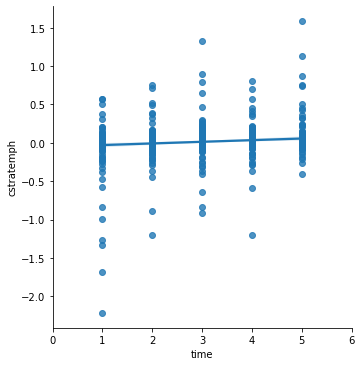

In [110]:
sns.lmplot(data=df,
          x = 'time',
          y='cstratemph',order= 1,
          )
plt.xticks(range(0,7))
plt.show()

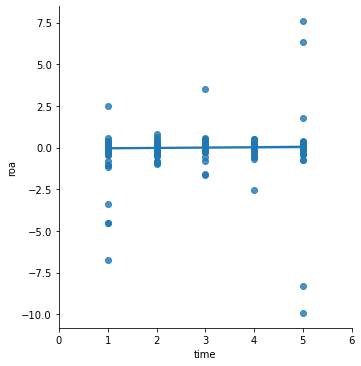

In [111]:
sns.lmplot(data=df,
          x = 'time',
          y='roa',order= 1,
          )
plt.xticks(range(0,7))
plt.show()

## Conditional Growth Model - Linear Growth

In [87]:
cnd_growth_model = sm.MixedLM.from_formula('cstratemph ~   time   + size + htech ' ,
                                           data = df, groups = df.id,re_formula='~time')
# cnd_growth_model = sm.MixedLM( exog= df[['const','time','mbo','size','htech']], endog= df[['cstratemph']], groups= df.id)

In [88]:
result5 = cnd_growth_model.fit()

C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [89]:
result5.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  cstratemph
No. Observations:  808      Method:              REML      
No. Groups:        187      Scale:               0.0344    
Min. group size:   1        Log-Likelihood:      76.9611   
Max. group size:   5        Converged:           Yes       
Mean group size:   4.3                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        -0.063    0.025 -2.499 0.012 -0.113 -0.014
time              0.021    0.006  3.275 0.001  0.008  0.033
size              0.006    0.005  1.106 0.269 -0.005  0.017
htech             0.024    0.021  1.139 0.255 -0.017  0.064
Group Var         0.045    0.059                           
Group x time Cov -0.011    0.016                           
time Var          0.003    0.005                           
===========================================================

"""

In [90]:
result5.resid.var()

0.027151998696849575

In [91]:
cnd_growth_model = sm.MixedLM.from_formula('cstratemph ~   time + mbo + time * mbo + size + htech ' ,
                                           data = df, groups = df.id,re_formula='~time')
# cnd_growth_model = sm.MixedLM( exog= df[['const','time','mbo','size','htech']], endog= df[['cstratemph']], groups= df.id)

In [92]:
result6 = cnd_growth_model.fit()

C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\Rasstin\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [93]:
result6.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM  Dependent Variable:  cstratemph
No. Observations:  808      Method:              REML      
No. Groups:        187      Scale:               0.0342    
Min. group size:   1        Log-Likelihood:      72.1136   
Max. group size:   5        Converged:           Yes       
Mean group size:   4.3                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        -0.033    0.031 -1.047 0.295 -0.094  0.029
time              0.012    0.008  1.570 0.117 -0.003  0.028
mbo              -0.077    0.044 -1.737 0.082 -0.164  0.010
time:mbo          0.022    0.013  1.700 0.089 -0.003  0.048
size              0.006    0.006  1.023 0.306 -0.005  0.017
htech             0.022    0.021  1.045 0.296 -0.020  0.064
Group Var         0.044    0.058                           
Group x time Cov -0.010    0.015                           
time Var          0.003    0.005                           
===========================================================

"""

In [94]:
result6.resid.var()

0.026926592009230036

In [95]:
# result.summary().as_latex()

In [96]:
from statsmodels.iolib.summary2 import summary_col

In [97]:
temp = summary_col([result5,result6],
                  model_names=['Model 1','Model 2'],
                  
                  stars=True,
                  regressor_order=['Intercept','mbo','time','time:mbo','size','htech','time Var','Group Var'])

In [98]:
# temp.title = 'Strategic Emphasis'

In [99]:
# temp.add_title('Strategic Emphasis')

In [100]:
temp

,Model 1,Model 2
Intercept,-0.0635**,-0.0327
,(0.0254),(0.0313)
mbo,,-0.0769*
,,(0.0443)
time,0.0208***,0.0125
,(0.0064),(0.0079)
time:mbo,,0.0221*
,,(0.0130)
size,0.0061,0.0058
,(0.0055),(0.0056)


In [101]:
result5.llf*-2,result6.llf*-2

(-153.92226880206817, -144.2272053148581)

In [102]:
result5.llf*-2 - result6.llf*-2

-9.695063487210064

In [103]:
#calculate likelihood ratio Chi-Squared test statistic
# reduced - full
LR_statistic = -2*(result5.llf-result6.llf)

print(LR_statistic)

#calculate p-value of test statistic using 2 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 2)
p_val

-9.695063487210064


1.0

In [63]:
pd.read_html(temp.as_html())

[                   0           1           2
 0                NaN     Model 1     Model 2
 1          Intercept   -0.0579**     -0.0327
 2                NaN    (0.0275)    (0.0313)
 3                mbo     -0.0110    -0.0769*
 4                NaN    (0.0211)    (0.0443)
 5               time   0.0207***      0.0125
 6                NaN    (0.0063)    (0.0079)
 7           time:mbo         NaN     0.0221*
 8                NaN         NaN    (0.0130)
 9               size      0.0058      0.0058
 10               NaN    (0.0055)    (0.0056)
 11             htech      0.0220      0.0224
 12               NaN    (0.0211)    (0.0214)
 13          time Var   0.0894***   0.0873***
 14               NaN    (0.0251)    (0.0249)
 15         Group Var   1.2719***   1.2741***
 16               NaN    (0.3104)    (0.3133)
 17  Group x time Cov  -0.2991***  -0.2928***
 18               NaN    (0.0822)    (0.0819)]

In [43]:
print(summary_col([result5,result6],
                  model_names=['1','2'],
                  
                  stars=True,
                  regressor_order=['Intercept','mbo','time','time:mbo','size','htech','time Var','Group Var']))


                     1          2     
--------------------------------------
Intercept        -0.0579**  -0.0327   
                 (0.0275)   (0.0313)  
mbo              -0.0110    -0.0769*  
                 (0.0211)   (0.0443)  
time             0.0207***  0.0125    
                 (0.0063)   (0.0079)  
time:mbo                    0.0221*   
                            (0.0130)  
size             0.0058     0.0058    
                 (0.0055)   (0.0056)  
htech            0.0220     0.0224    
                 (0.0211)   (0.0214)  
time Var         0.0894***  0.0873*** 
                 (0.0251)   (0.0249)  
Group Var        1.2719***  1.2741*** 
                 (0.3104)   (0.3133)  
Group x time Cov -0.2991*** -0.2928***
                 (0.0822)   (0.0819)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
